In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

In [44]:
match_rep_df = pd.read_csv("../../../checkpoints/match_rep_df.csv")
match_rep_df = match_rep_df[match_rep_df["sphering"] == True]
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
2,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
3,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
4,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.153125,54.444444,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.205267,544244
177,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.142486,61.111111,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",18.604651,0.209276,543826
178,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.172448,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.232543,489099
179,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.133543,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.192271,452567


In [45]:
# Find the names of plates that contain at least 3 sites
three_plus =  match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sites"] >= 3)
    ]["Assay_Plate_Barcode"].values

# Subset df so that it only contains profiles (and their sitesubsampled profiles) that have at least 3 sites
three_plus_df = match_rep_df[match_rep_df["Assay_Plate_Barcode"].isin(three_plus)]

three_plus_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
2,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
3,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
4,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.153125,54.444444,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.205267,544244
177,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.142486,61.111111,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",18.604651,0.209276,543826
178,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.172448,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.232543,489099
179,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.133543,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.192271,452567


In [46]:
# Use unique since siteSubSampled data has the same plate name as the parent
plates = three_plus_df["Assay_Plate_Barcode"].unique()

out_df = pd.DataFrame()

# For each group of plates, find linear regression between the cell count and percent replicating value
for plate in plates:
    x = three_plus_df[three_plus_df["Assay_Plate_Barcode"] == plate]["cell_count"]
    y_replicating = three_plus_df[three_plus_df["Assay_Plate_Barcode"] == plate]["Percent_Replicating"]
    y_matching = three_plus_df[three_plus_df["Assay_Plate_Barcode"] == plate]["Percent_Matching"]

    slope_replicating, intercept_replicating, rvalue_replicating, pvalue_replicating, _ = scipy.stats.linregress(x, y_replicating)

    slope_matching, intercept_matching, rvalue_matching, pvalue_matching, _ = scipy.stats.linregress(x, y_matching)

    out_df = pd.concat([out_df, pd.DataFrame.from_dict({
        "Assay_Plate_Barcode": [plate],
        "slope_replicating":[slope_replicating],
        "rvalue_replicating": [rvalue_replicating],
        "pvalue_replicating": [pvalue_replicating],
        "slope_matching":[slope_matching],
        "rvalue_matching": [rvalue_matching],
        "pvalue_matching": [pvalue_matching]
        })])

out_df

,Assay_Plate_Barcode,slope_replicating,rvalue_replicating,pvalue_replicating,slope_matching,rvalue_matching,pvalue_matching
0,Plate2_PCO_6ch_4site_10XPA,3.892826e-06,0.845894,0.154106,2.742228e-06,0.770959,0.229041
0,Plate3_PCO_6ch_4site_10XPA_Crest,7.444962e-07,0.902906,0.097094,-3.404652e-07,-0.118963,0.881037
0,Plate3_PCO_6ch_4site_10XPA_Crestz,1.498054e-06,0.391932,0.608068,1.579394e-06,0.904709,0.095291
0,Plate3_PCO_6ch_4site_20XPA_Crestz,1.381770e-05,0.594345,0.405655,8.910456e-06,0.687383,0.312617
0,Plate2_PCO_6ch_9site_20XPA,1.608116e-05,0.997145,0.000183,3.662668e-06,0.664477,0.221183
0,Plate3_PCO_6ch_9site_20XPA_Crest,2.009000e-06,0.244416,0.691927,-2.944008e-07,-0.100270,0.872546
0,BR00117061a,7.042806e-06,0.982315,0.002816,3.082598e-06,0.939638,0.017640
0,BR00117062a,5.061334e-06,0.816630,0.091623,-2.480663e-07,-0.120033,0.847536
0,BR00117063b,4.985477e-06,0.916992,0.028348,1.583452e-06,0.467926,0.426737
0,CP_Broad_Phenix_C_BIN1_1Plane_P1,2.742711e-05,0.974731,0.143419,-1.021961e-05,-0.530132,0.644285


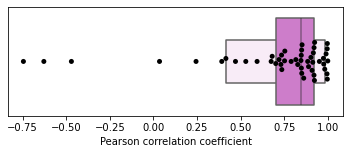

In [48]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.boxenplot(x=out_df["rvalue_replicating"], showfliers=False, color="orchid", ax=ax)
sns.swarmplot(x=out_df["rvalue_replicating"], color="black", ax=ax)
# fig.set_title("")
ax.set_xlabel("Pearson correlation coefficient")
ax.tick_params(left=False)
fig.set_facecolor("white")
# fig.savefig("(S3A)-percent_replicating-cell_count_linregress-r_value.png", dpi=300, bbox_inches="tight")

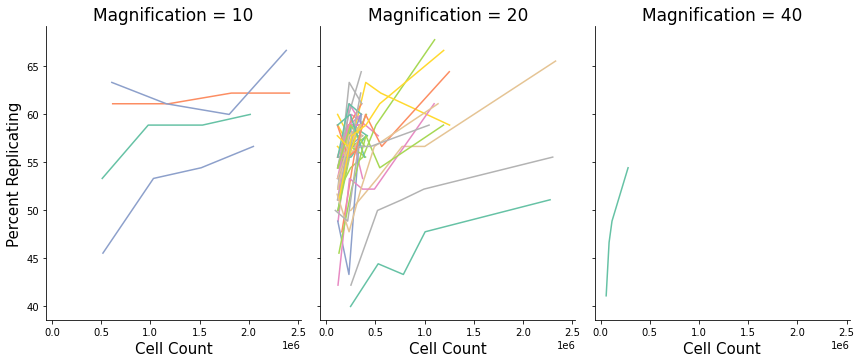

In [49]:
fig = sns.relplot(data=three_plus_df, x="cell_count", y="Percent_Replicating", hue="Assay_Plate_Barcode", legend=False, col="Magnification", kind="line", palette="Set2", aspect=.8)
fig.set(xlabel="Cell Count", ylabel="Percent Replicating")
for ax in fig.axes.flatten():
    ax.title.set_size(17)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

# fig.savefig("(S3B)-percent_replicating-vs-cell_count-magnifcation_facet.png", dpi=300)